In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report, roc_curve

In [2]:
stopwords=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [3]:
df = pd.read_csv('news.csv', index_col = 0)
df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(26000, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26000 entries, 0 to 25999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   25320 non-null  object
 1   author  23540 non-null  object
 2   text    25954 non-null  object
 3   label   26000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1015.6+ KB


In [6]:
df.isna().sum()

title      680
author    2460
text        46
label        0
dtype: int64

In [7]:
df.fillna(' ',inplace=True)

In [8]:
df['content'] = df['title'] + ' ' + df['author']
df.head()

,title,author,text,label,content
id,,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


### Stemming 
The process of reducing a word to its base or root form, by removing suffixes and prefixes

In [9]:
def stemming(inputs):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', inputs)
    stemmed_content = stemmed_content.lower().split()
    stemmed_content = [PorterStemmer().stem(word) for word in stemmed_content if not word in stopwords]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [10]:
df['content'] = df['content'].apply(stemming)

In [11]:
df['content']

id
0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2                   truth might get fire consortiumnew com
3        civilian kill singl us airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
25995    bangladeshi traffic jam never end new york tim...
25996    john kasich sign one abort bill ohio veto rest...
25997    california today exactli sushi new york time m...
25998                us marin deploy russian border norway
25999        awkward sex onscreen new york time teddi wayn
Name: content, Length: 26000, dtype: object

## Converting the textual data to numerical data

In [12]:
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
counts = count_vectorizer.fit_transform(df['content'].values)
tfidf = transformer.fit_transform(counts)
tfidf.shape

(26000, 157087)

## Split data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(tfidf, df['label'], test_size=0.2, random_state=2023)

## Models

In [14]:
def train(model , model_name):
    model.fit(X_train,y_train)
    print(f"Training accuracy of {model_name} is {model.score(X_train,y_train)}")
    print(f"testing accuracy of {model_name} is {model.score(X_test,y_test)}")
def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test
    )
def class_report(model):
    print(classification_report(
        y_test,
        model.predict(X_test)
    ))

In [15]:
model_lr = LogisticRegression()

In [16]:
train(model_lr, 'LogisticRegression')

Training accuracy of LogisticRegression is 0.9279326923076923
testing accuracy of LogisticRegression is 0.9055769230769231


In [17]:
class_report(model_lr)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2513
           1       0.89      0.94      0.91      2687

    accuracy                           0.91      5200
   macro avg       0.91      0.90      0.91      5200
weighted avg       0.91      0.91      0.91      5200



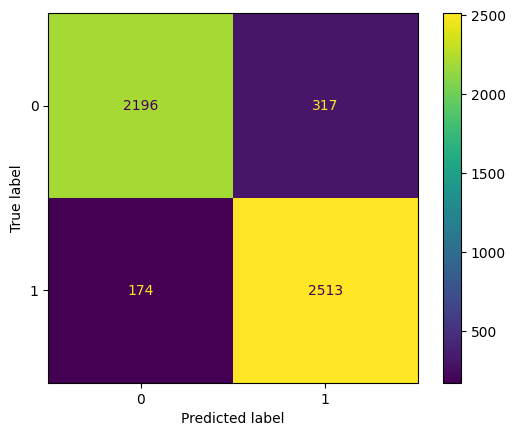

In [18]:
conf_matrix(model_lr)